## Analyzing the Air bnb datasets for Seattle and Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date: 15 October 2020

#### Import the libraries 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the datasets

In [115]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [116]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


#### Seattle Datasets

In [117]:
seattle_df_listings = pd.read_csv(seattle_dir+'listings.csv')
seattle_df_calendar = pd.read_csv(seattle_dir+'calendar.csv')
seattle_df_reviews = pd.read_csv(seattle_dir+'reviews.csv')
print('Seattle datasets read...')

Seattle datasets read...


## EDA for both datasets

#### Datasets shapes

In [118]:
print('BOSTON')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 4)
Reviews dataset: (68275, 6)


In [119]:
print('SEATTLE')
print('Listings dataset: {}'.format(seattle_df_listings.shape))
print('Calendar dataset: {}'.format(seattle_df_calendar.shape))
print('Reviews dataset: {}'.format(seattle_df_reviews.shape))

SEATTLE
Listings dataset: (3818, 92)
Calendar dataset: (1393570, 4)
Reviews dataset: (84849, 6)


#### Nan values in the datasets

In [120]:
boston_nulls_listings = boston_df_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


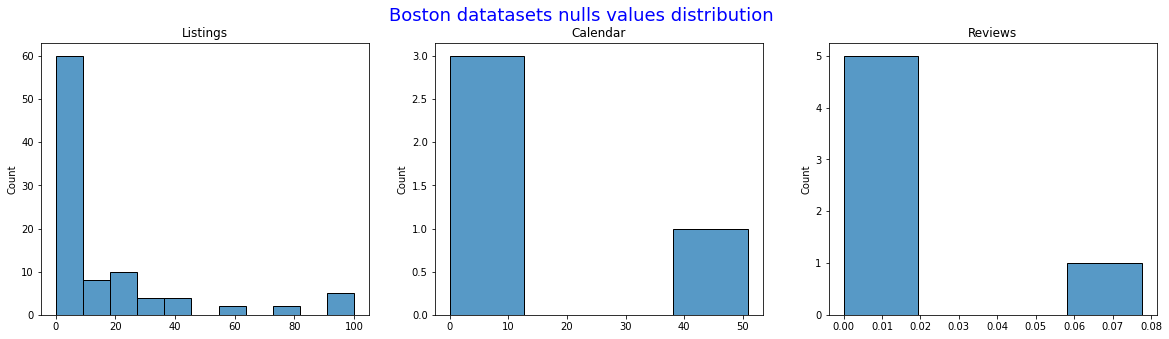

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

In [122]:
seattle_nulls_listings = seattle_df_listings.isnull().sum()/seattle_df_listings.shape[0]*100
seattle_nulls_calendar = seattle_df_calendar.isnull().sum()/seattle_df_calendar.shape[0]*100
seattle_nulls_reviews  = seattle_df_reviews.isnull().sum()/seattle_df_reviews.shape[0]*100

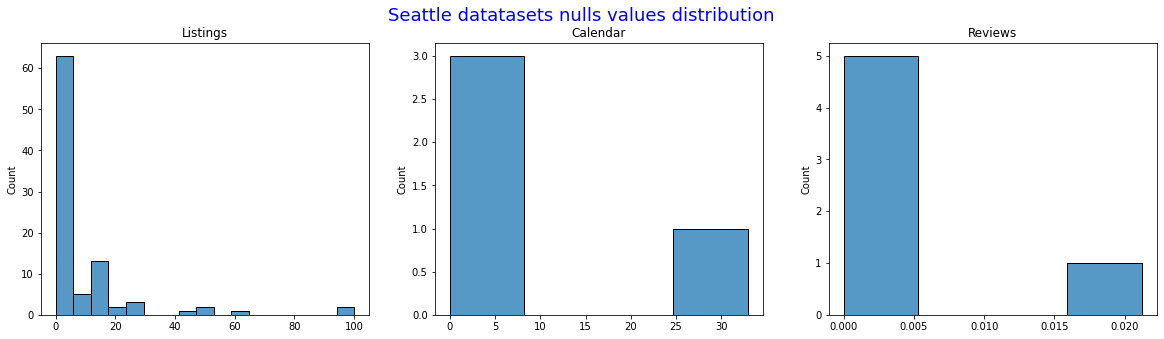

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Seattle datatasets nulls values distribution', fontsize=18, c='b')

sns.histplot(data=seattle_nulls_listings,x=seattle_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=seattle_nulls_calendar,x=seattle_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=seattle_nulls_reviews,x=seattle_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that in both cities Seattle and Boston the Listings datasets have the more columns with Nan values

#### Columns with more than 50% Nan Values

In [124]:
print('BOSTON')
print('Listings dataset columns with more than 50% Nan values')
boston_df_listings.columns[boston_nulls_listings >= 50]

BOSTON
Listings dataset columns with more than 50% Nan values


Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [125]:
print('SEATTLE')
print('Listings dataset columns with more than 50% Nan values')
seattle_df_listings.columns[seattle_nulls_listings >= 50]

SEATTLE
Listings dataset columns with more than 50% Nan values


Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

### Convert date columns to year, month, week, dayofWeek

In [207]:
boston_df_calendar['month'] = pd.to_datetime(boston_df_calendar['date']).dt.month
boston_df_calendar['year'] = pd.to_datetime(boston_df_calendar['date']).dt.year
boston_df_calendar['dayofweek'] = pd.to_datetime(boston_df_calendar['date']).dt.dayofweek

In [208]:
seattle_df_calendar['month'] = pd.to_datetime(seattle_df_calendar['date']).dt.month
seattle_df_calendar['year'] = pd.to_datetime(seattle_df_calendar['date']).dt.year
seattle_df_calendar['dayofweek'] = pd.to_datetime(seattle_df_calendar['date']).dt.dayofweek

In [127]:
boston_df_listings.shape

(3585, 95)

In [128]:
boston_df_calendar.shape

(1308890, 4)

In [130]:
boston_df_reviews.shape

(68275, 6)

In [132]:
boston_df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [136]:
boston_df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [137]:
boston_df_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [216]:
boston_df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [219]:
boston_df_calendar.query('listing_id == 12147973').count()

listing_id    365
date          365
available     365
price           0
month         365
year          365
dayofweek     365
dtype: int64

In [222]:
boston_df_listings.id.value_counts()

7984226     1
14282764    1
8518665     1
7693009     1
5521378     1
           ..
6014302     1
12094488    1
1819994     1
9755993     1
1112067     1
Name: id, Length: 3585, dtype: int64

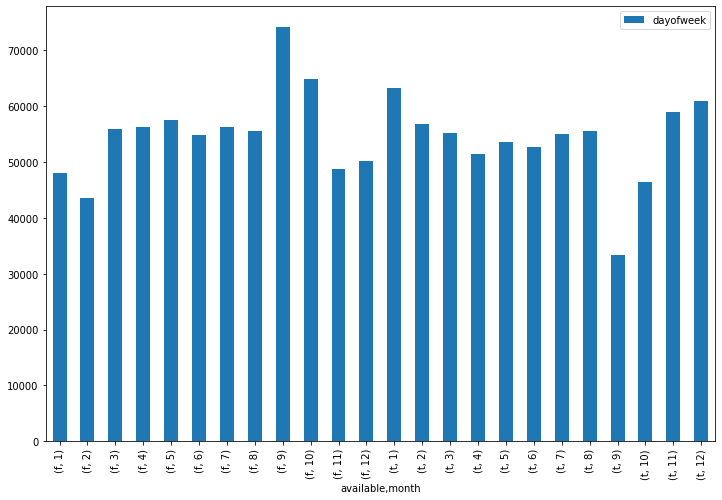

In [188]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_b.plot.bar(ax=ax);

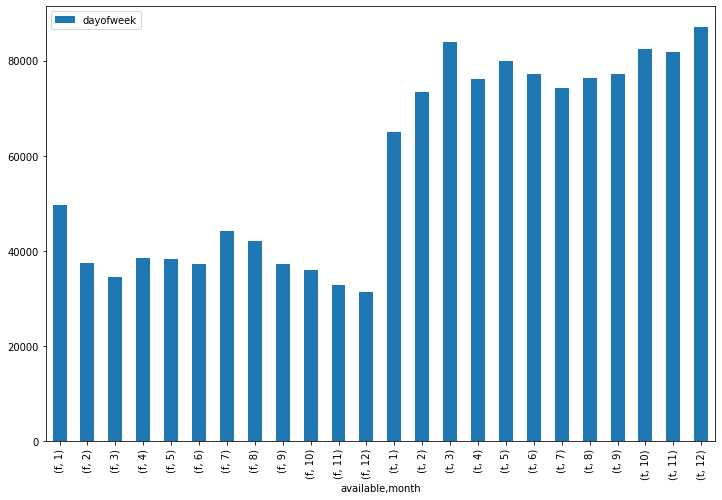

In [189]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_s.plot.bar(ax=ax);

In [193]:
boston_df_listings.columns.to_frame().head(95)

,0
id,id
listing_url,listing_url
scrape_id,scrape_id
last_scraped,last_scraped
name,name
...,...
cancellation_policy,cancellation_policy
require_guest_profile_picture,require_guest_profile_picture
require_guest_phone_verification,require_guest_phone_verification
calculated_host_listings_count,calculated_host_listings_count


In [200]:
c.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [229]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 20)
boston_df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airb...,20160906204935,2016-09-07,Sunny Bungalow i...,"Cozy, sunny, fam...",The house has an...,"Cozy, sunny, fam...",none,Roslindale is qu...,NaN,The bus stop is ...,You will have ac...,NaN,Clean up and tre...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,31303940,https://www.airb...,Virginia,2015-04-15,"Boston, Massachu...",We are country a...,NaN,NaN,NaN,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,f,"Birch Street, Bo...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless In...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airb...,20160906204935,2016-09-07,Charming room in...,Charming and qui...,Small but cozy a...,Charming and qui...,none,The room is in R...,If you don't hav...,Plenty of safe s...,Apt has one more...,"If I am at home,...",Pet friendly but...,https://a1.musca...,https://a1.musca...,https://a1.musca...,https://a1.musca...,2572247,https://www.airb...,Andrea,2012-06-07,"Boston, Massachu...",I live in Boston...,within an hour,100%,100%,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,Pinehurst Street...,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wi...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airb...,20160906204935,2016-09-07,Mexican Folk Art...,Come stay with a...,Come stay with a...,Come stay with a...,none,The LOCATION: Ro...,I am in a scenic...,PUBLIC TRANSPORT...,I am living in t...,ABOUT ME: I'm a ...,I encourage you ...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,16701,https://www.airb...,Phil,2009-05-11,"Boston, Massachu...",I am a middle-ag...,within a few hours,100%,88%,t,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,"Ardale St., Bost...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""...",NaN,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2009-07-

In [246]:
boston_df_listings.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [231]:
boston_df_listings.shape

(3585, 95)